<a href="https://colab.research.google.com/github/danieldang1806/datascience_projects/blob/main/Credit_Card_Guided_Project_(FULL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Analysis Guided Project

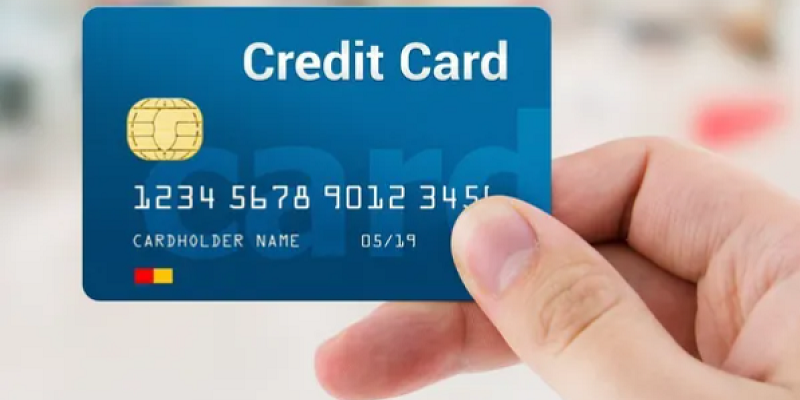

Hello! Welcome to the **Guided Project series** 😀 <br> This project is intended to help you with some ideas on how a data analysis should be, so that you can get over Milestone and Final projects at the fastest time with a "Passed" right after the first round! Now, let's start this journey! 

Supposedly, you are a Data Analyst in Credit Card Department of CoderSchool Bank. You have the authority to access to a database consisting of 10,000 customers mentioning their age, salary, marital status, credit card limit, etc. <br> Using this dataset, we will go from the beginning till the end of a data analysis project. <br>

You can download the CSV file [here](https://drive.google.com/file/d/1zVs6Zd1p0P_NuiV8ZSsZ-Rxv8G9p7VK7/view?usp=sharing). After that, put it in your Google Drive and change the path to your saved location on Google Drive at the below code cell. 

First, please take a look on the explaination of each column in this dataset [here](https://docs.google.com/document/d/1KJXPpLpI_GCBsFFCmSjWHk04tzqJHGHW7gfRnXavKao/edit?usp=sharing).

*Disclaimer*:  this is a guided project where we want to show you the basic ideas on the flow of a basic data analysis. You are encouraged to proceed your own analysis in any approaches. 

## Preparation & Cleaning Data

#### 1. Import relevant libraries

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Overview of the dataset

We firstly have a look to the overview of dataframe

In [ ]:
pd.options.display.max_columns = None

In [ ]:
# Change the below path to yours
df = pd.read_csv('/content/drive/MyDrive/Live session dataset/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape

(10127, 23)

This dataset contains 10,127 rows and 20 columns

Then, we will find out the data type of each column as well as the overview of null value distribution over columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

This dataset include data types such as:
- Number: `int64`, `float64`
- String: `object` 

Besides, there are 2 columns that have null values:
- Marital_Status
- Income_Category

#### 3. Remove unwanted data

There are 3 columns that we do need for our analysis: 
- CLIENTNUM
- 2 columns regarding Naive Bayes statistics

In [ ]:
# In order to get the name of all columns
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# Except CLIENTNUM, 2 other columns are at the end of list
# We first get the length of list and then minus to 1 and 2 to get the position of these 2 columns
print(f'Length of the list: {len(df.columns)}')
print(f'Name of the first unneccessary column: {df.columns[len(df.columns) - 1]}')
print(f'Name of the second unneccessary column: {df.columns[len(df.columns) - 2]}')

Length of the list: 23
Name of the first unneccessary column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Name of the second unneccessary column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1


In [ ]:
# Execute the drop function
df = df.drop(columns = ['CLIENTNUM', df.columns[len(df.columns) - 1], df.columns[len(df.columns) - 2]])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### 4. Deal with missing values

Despite of the fact that we tend to use drop function when dealing with missing data, that should not be the first thing you come up with. Understanding your data is the most important thing you should be familiar before making any further steps. <br> 
Let's see which columns contain missing values:

In [ ]:
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In some cases, we would like to know how these null values account for in the total. 

In [ ]:
df.isna().sum() / df.shape[0]

Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.000000
Marital_Status              0.073961
Income_Category             0.109805
Card_Category               0.000000
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.000000
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Amt_Chng_Q4_Q1        0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Total_Ct_Chng_Q4_Q1         0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64

Missing values in these 2 columns account for less than 10% of total. Let's plot it to have a view in depth:

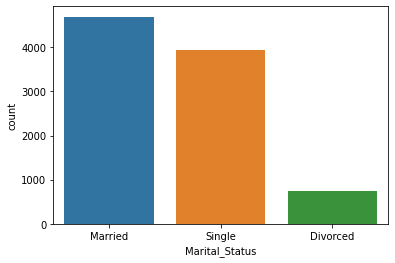

In [ ]:
sns.countplot(data=df, x='Marital_Status')

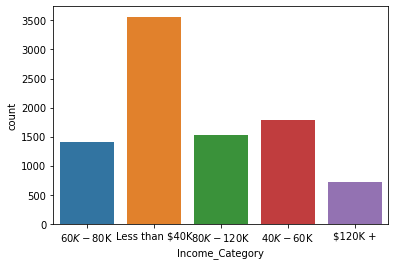

In [ ]:
sns.countplot(data=df, x='Income_Category')

As we can see, the characteristics of these columns are all categorical. Therefore, missing values do not affect to the analysis of these variables. In another way, we can fill these missing value rows with a term that is irrelevant to the others

In [ ]:
# As we can fill null values in these 2 columns with one value, we can use function fillna with the whole dataset
df = df.fillna('Unknown')

In [ ]:
# Recheck whether there is any null values still
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

However, as an example, we would like to investigate about the background of our customers. Keeping the missing information as "Unknown" will not be helpful. <br>
So, we will get rid of "Unknown" from our dataset:

In [ ]:
df = df[df['Education_Level'] != 'Unknown']
df = df[df['Income_Category'] != 'Unknown']

#### 4. Deal with duplication

In [ ]:
# Check whether there is any duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10121    False
10122    False
10124    False
10125    False
10126    False
Length: 7641, dtype: bool

In [ ]:
# Display as dataframe
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


As there are no duplicated values existed, we are all good to go

#### 5. Correct labeled data for further analysis

As we have learned, it is a normal thing that your dataset contains mislabeled and corrupted data. Besides, there are cases the labels of data do not fit your intend on the further analysis. We need to change it to a suitable way for easy working out.

**Numerical variables:**

In [ ]:
# Continuous columns
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000
mean,46.303756,2.351525,35.950530,3.814553,2.343411,2.450988,8559.183209,1166.122628,7393.060581,0.759349,4415.400864,64.667190,0.711507,0.280656
std,7.958827,1.290410,7.941765,1.550470,0.999927,1.103059,9162.211045,813.282318,9171.863364,0.221131,3457.148069,23.745462,0.237953,0.278156
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2507.000000,451.000000,1255.000000,0.630000,2109.000000,44.000000,0.583000,0.025000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4343.000000,1280.000000,3292.000000,0.735000,3866.000000,67.000000,0.700000,0.184000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10877.000000,1781.000000,9663.000000,0.858000,4751.000000,81.000000,0.818000,0.513000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


Using `df.describe()` will give you the statistical information of all continuous variables in the dataset

(20.0, 80.0)

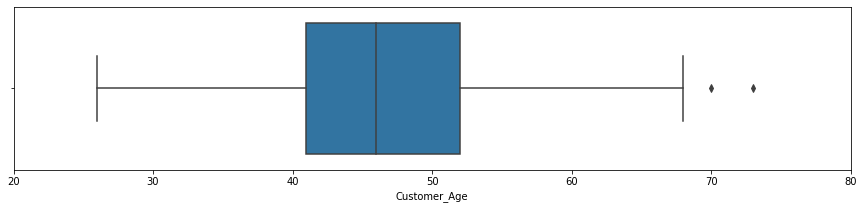

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='Customer_Age')
plt.xlim(20,80)

What we can get from above Box plot of `Customer_Age`:
- Mininum: our youngest customers are at the age of 26
- Lower Quartile (25%): 25% of our customers are under 41 y.o
- Median (50%): half of our customers are under 46 y.o
- Upper Quartile (75%): 75% of our customers are under 52 y.o (or in another words, 25% of our customers are above 52 y.o)
- Maximum: our oldest customers are at the age of 73 y.o

Histogram can be a good chart to support the above explanation on Box plot

(20.0, 80.0)

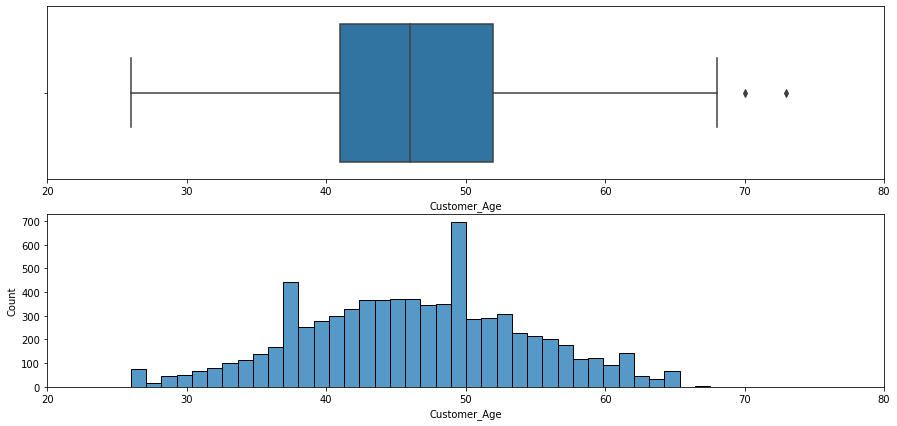

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(211)
sns.boxplot(data=df, x='Customer_Age')
plt.xlim(20,80)

plt.subplot(212)
sns.histplot(data=df, x='Customer_Age')
plt.xlim(20,80)

In [ ]:
# 1. Calculate the quantiles 
q1 = df['Customer_Age'].quantile(0.25) # Tính Q1
q3 = df['Customer_Age'].quantile(0.75) # Tính Q3 

# 2. Calculate the interquantile range
iqr = q3 - q1
iqr

# # 3. Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

df[df['Customer_Age'] > upper]['Customer_Age']

251    73
254    70
Name: Customer_Age, dtype: int64

Using IQR, we know that there are 2 outliers of variable `Customer_Age`: 70 and 73 years old. <br>
The same method can be applied to any columns that you have interests.

**Categorical variables:**

In [ ]:
# Recall on how to check the data type of one column
print(df['Income_Category'].dtype)

object


In [ ]:
# Create an empty list to put name of categorical columns here
cat_name = []

# Use for loop to loop through all columns and find the "object" datatype
for col in df.columns:
  if df[col].dtype == "object":
    cat_name.append(col)

# Get the result
print(cat_name)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [ ]:
# Display in dataframe
df[cat_name]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10121,Existing Customer,F,Graduate,Single,Less than $40K,Blue
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


We usually have 2 types of categorical variable: 
- **Nominal data**: name, hair color, gender, marital status
- **Ordinal data** (set of order): customer satisfaction with a scale of score from 1 to 5, education level, income level

In this scale of dataset, we have these columns that can be converted into level score:
- `Education_Level`
- `Income_Category`

For example: `Education_Level` can be sorted from low to high level as following: <br>
Uneducated -> High School -> College -> Post-Graduate -> Graduate -> Doctorate

In our lecture, we learned how to use a combination of `def` and `apply`. In a real world, this combination can take you a lot of time if you have tons of row as it needs to go through each of row in your dataframe. <br>
In order to avoid that, we can use `map` to make your life easier 🤘

In [ ]:
# First, we need to make a dictionary about how you want to score to each kind of label
edu_level_dict = {'Uneducated': 0, 
                  'High School': 1, 
                  'College': 2, 
                  'Post-Graduate': 3, 
                  'Graduate': 4,
                  'Doctorate': 5}

# Then, we use map function to map the Education_Level column to the above dictionary
# Note: it is best practice to create a new column instead of overwriting
df['edu_level'] = df['Education_Level'].map(edu_level_dict)

The same will be applied to `Income_Category`

In [ ]:
income_level_dict = {'Less than $40K': 0,
                     '$40K - $60K': 1, 
                     '$60K - $80K': 2, 
                     '$80K - $120K': 3, 
                     '$120K +': 4}

df['income_level'] = df['Income_Category'].map(income_level_dict)

In [ ]:
df[['edu_level', 'income_level']]

,edu_level,income_level
0,1,2
1,4,0
2,4,3
3,1,0
4,0,2
...,...,...
10121,4,0
10122,4,1
10124,1,0
10125,4,1


## Exploratory Data Analysis (EDA)

It is a good practice to come up with different ideas before diving deeper into your dataset. Or if not, you may want to go through all the variables to see how your data is distributed and do you have any chances in combining these variables together to form an interesting insight! 

Let's first make a script for this dataset. For example, **you get a request from your boss on analyzing our customers**. That's it! 😰

Let's analyze your boss's request first. He/She would like to know about the situation of customers. We may come up with some ideas:
- We have data about our customers' demography like age, gender, educational and economic background
- We also have some metrics on business performance like how long customers have been with us, number of products they have used, their transaction amount during the year...
- Based on above things, let's try to combine these together to see whether there is any ideas can be used 💡

As the boss specifically would like to know about the current situation, let's talk about the customers who left vs stayed

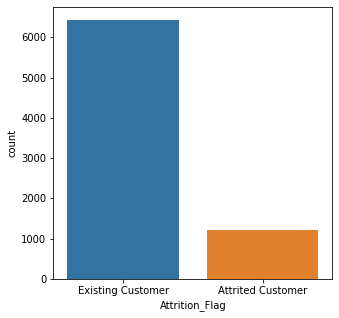

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Attrition_Flag')

In [ ]:
df['Attrition_Flag'].value_counts() / df.shape[0]

Existing Customer    0.841513
Attrited Customer    0.158487
Name: Attrition_Flag, dtype: float64

Although Churn customers only account for 16% of total customers, we have to investigate on it to see whether there is any patterns/trends of this type of customer. <br>
Let's first try on the Age of customer:

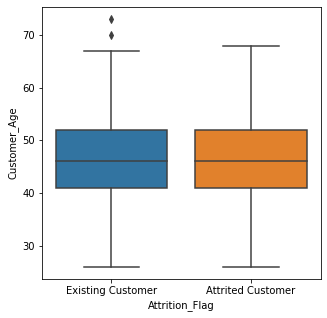

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')

Not big difference between these 2 groups when we measure customers' ages. Let's move on Gender:

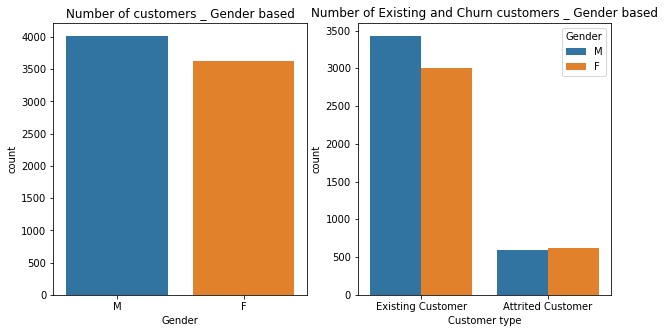

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.countplot(data=df, x='Gender')
plt.title('Number of customers _ Gender based')

plt.subplot(122)
sns.countplot(data=df, x='Attrition_Flag', hue='Gender')
plt.xlabel('Customer type')
plt.title('Number of Existing and Churn customers _ Gender based')

plt.show()

In our database, number of Female customers are lower than Male (left chart) while more Female customers left us than Male (!!!) <br> 
Wonderful! You have found the insight! 🤯

## Insights

First, let's make a big question for this project: 
**Why must we bring our female customers back?**

You are now officially going deeper into the wood, but we need to define what is our metric to analyze. As we are talking about the credit card and we are at our bank side, we need customers who only pay at a minimum amount and willing to accept amount of interest rate monthly. <br>
Relook at the dataset, `Avg_Utilization_Ratio`, which takes 2 factors: debt and credit limit into its formula, is a good one to measure behaviours of our customers on credit card. (this term will be used **AUR** to be shorted)

Besides, you also need to set your audience target so that you can understand on which points/ at which level of details you need to present to your audiences.

To recap: 
- **Main metric**: Average Utilization Ratio
- **Target audience**: Line Manager

#### Churn customers situation

In [ ]:
color_r = ['lightgray', 'red']

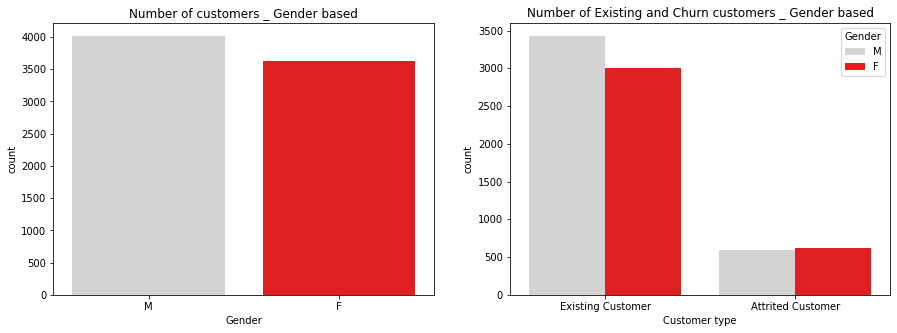

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(data=df, x='Gender', palette=color_r)
plt.title('Number of customers _ Gender based')

plt.subplot(122)
sns.countplot(data=df, x='Attrition_Flag', hue='Gender', palette=color_r)
plt.xlabel('Customer type')
plt.title('Number of Existing and Churn customers _ Gender based')

plt.show()

At our bank, number of Female customers is currently lower than Male ones while Female customers tend to cancelled their credit card more than Male although the difference is not that big. It is such an alarm that the number of our Female customers will drop harder if there is no actions taken.

#### Credit card usage behaviour

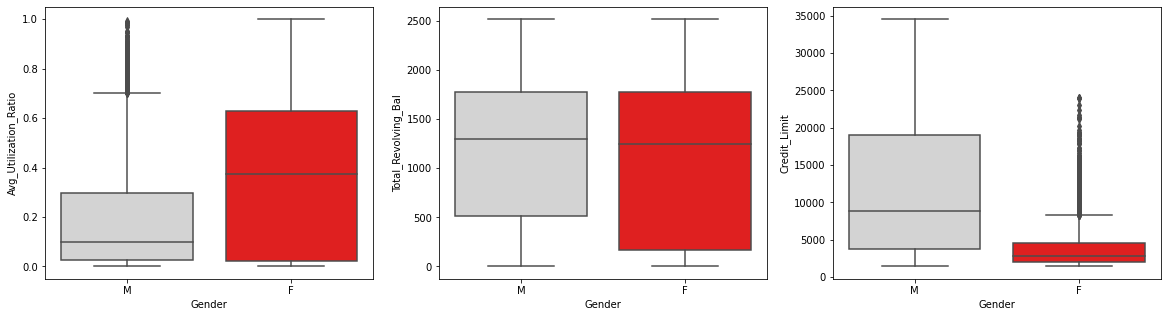

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.boxplot(data=df, x='Gender', y='Avg_Utilization_Ratio', palette=color_r)

plt.subplot(132)
sns.boxplot(data=df, x='Gender', y='Total_Revolving_Bal', palette=color_r)

plt.subplot(133)
sns.boxplot(data=df, x='Gender', y='Credit_Limit', palette=color_r)

Female customers are always the potential ones as only half of them already have higher AUR than three-quarters of Male counterparts. <br>
These customers are also the ones who have very low credit limit but almost the same Total Revolving Balance with Male customers as it indicated that they only paid a minimum amount monthly and they are willing to pay interest rate, which our business are relying on. 

#### Number of products

In [ ]:
product = df.groupby(['Gender', 'Total_Relationship_Count'])['Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Credit_Limit'].mean().reset_index()
product

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Gender,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Revolving_Bal,Credit_Limit
0,F,1,0.339565,1170.037037,4529.138580
1,F,2,0.330663,1131.049881,4610.617340
2,F,3,0.361550,1112.237745,3808.551716
3,F,4,0.401839,1179.745714,3564.370571
4,F,5,0.392584,1176.037088,3875.663049
5,F,6,0.371411,1150.472527,3994.667347
6,M,1,0.152805,1195.394521,15808.597534
7,M,2,0.166249,1138.500000,14598.104150
8,M,3,0.193215,1172.823982,12337.162046
9,M,4,0.202326,1161.978780,12307.143501


In [ ]:
color = ['red', 'lightgray']

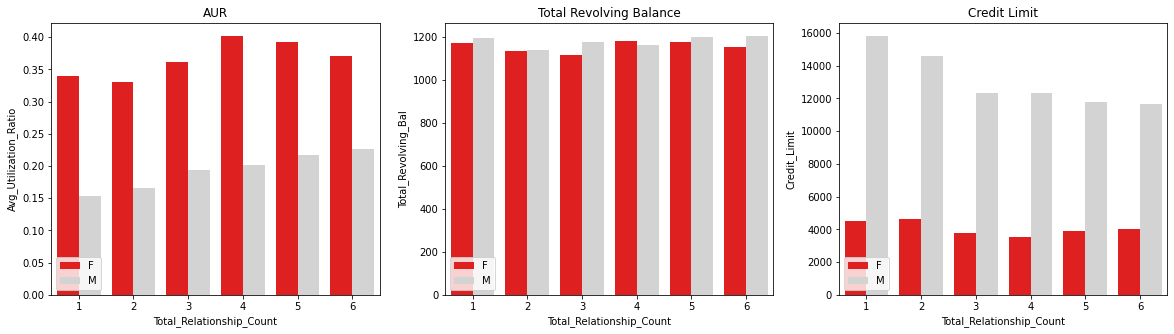

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.barplot(data=product, x='Total_Relationship_Count', y='Avg_Utilization_Ratio', hue='Gender', palette=color)
plt.legend(loc='lower left')
plt.title('AUR')

plt.subplot(132)
sns.barplot(data=product, x='Total_Relationship_Count', y='Total_Revolving_Bal', hue='Gender', palette=color)
plt.legend(loc='lower left')
plt.title('Total Revolving Balance')

plt.subplot(133)
sns.barplot(data=product, x='Total_Relationship_Count', y='Credit_Limit', hue='Gender', palette=color)
plt.legend(loc='lower left')
plt.title('Credit Limit')

plt.show()

In any number of cards one customer owns, female customers have much higher AUR than Male counterparts and they tend to utilize these cards for their daily payment. 

#### Payment amount

In [ ]:
df['Amt_Ct_Percent'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

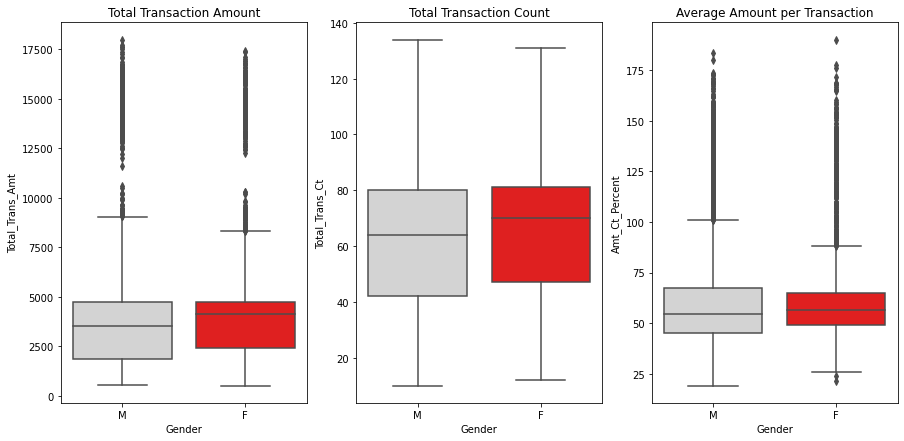

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(131)
sns.boxplot(data=df, x='Gender', y='Total_Trans_Amt', palette=color_r)
plt.title('Total Transaction Amount')

plt.subplot(132)
sns.boxplot(data=df, x='Gender', y='Total_Trans_Ct', palette=color_r)
plt.title('Total Transaction Count')

plt.subplot(133)
sns.boxplot(data=df, x='Gender', y='Amt_Ct_Percent', palette=color_r)
plt.title('Average Amount per Transaction')

plt.show()

Female customers have much higher transaction amount during the year. Besides, number of transaction during the year and the average amount per transaction of them are also higher than Male ones. 

## Conclusion

- On average, during the year, female customers dominated AUR over male counterparts
- They also the ones who tend to use multiple cards and accept the amount of interest rate charged monthly
- Female customers' transaction amount during the year as well as the average amount per transaction are all higher than Male customers

*This is just a recommended conclusion only. You can come up with your own conclusion based on your analysis.

## One last note!

We have some points that need your attention about your upcoming projects:
- To learners who are gonna proceed **MILESTONE** project: you are not required to give Recommendations at this stage. Conclusions that cover all the main points of your analysis are the good ones to end your Milestone project
- To learners who are gonna proceed **FINAL** project: you are required to come up with Recommendations based on insights you have found out

## Export to Google Sheet for visualization on Tableau

This is the step you are gonna export all the above tables/dataframe you worked out to Google Sheets that would be used for visualization on Tableau. <br>
If you get some errors during copy below codes and apply, please refer to the Recorded video (Ep 2 of this Series).

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax 
import gspread
from google.auth import default
creds, _ = default()
from gspread_dataframe import set_with_dataframe

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('credit_card_project')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):

    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 20000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
export_data_to_new_sheet('1uAAn8VjRF78Kb0UWN7OGK4yCDViBnUstFedISQyrMGs', 'all_data', df)
export_data_to_new_sheet('1uAAn8VjRF78Kb0UWN7OGK4yCDViBnUstFedISQyrMGs', 'product', product)

# Final presentation file

It's finally the last step that you will put all the above things into one Presentation file to show up your hard works. <br>
You can make a reference to the following ppt which we want to show you ideas on how a presentation of data analysis ideally should be. <br> 

In [ ]:
from IPython import display

In [ ]:
display.IFrame(src="https://drive.google.com/file/d/1BP_BVIpw_L3QtcqT3BGmmlM3syXroka4/preview", width=990, height=599)

We hope 2 episodes of this Guided project series will be helpful for your upcoming journeys both in CoderSchool and your later real works 😊

# Just one last thing!

Hi there! Please help to spend some minutes to fill out the below feedback form. Your feedback is such a huge power so that we can create more contents helping you on the Data Analyst journey ahead! 🙌

In [ ]:
display.IFrame(src="https://docs.google.com/forms/d/e/1FAIpQLSdBKamcKtEqI-k4QiGCauNt5wjyTk8FOvJnc3RrHUSVRSEerw/viewform?embedded=true", width=640, height=1647)